# Coursework - Quickhull Algorithm

In [1]:
# Import Python libraries.

import csv
import sys
import math
import random
import matplotlib.pyplot as plt

In [2]:
def plot_convexhull(points, convex_hull):
    """
    Plot a set of points and the convex hull.
    Input:
        points <'list'>      - A set of points in the form of x, y, label.
        convex_hull <'list'> - The convex hull in the form of x, y, label.
    Output:
        0.
    """

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    if(len(convex_hull) > 0):
        loophull = convex_hull + [convex_hull[0]]
    else:
        loophull = []

    plt.plot([p[0] for p in points], [p[1] for p in points], 'ro')  # point
    plt.plot([p[0] for p in loophull], [p[1] for p in loophull])  # convex hull


    plt.axis('on')
    plt.show()

    return



In [3]:
def quickhull(points):
    """
    Begin the quickhull algorithm by splitting the points intersected by the right and left most points.
    Input:
        points <'list'>      - A set of points in the form of x, y, label.
    Output:
        The points on the convex hull in order.
    """
    
    # Initialising list for the points that lie on the convex hull.
    convexHull = []
    
    # Initialising point variables
    minPoint = points[0]
    maxPoint = points[0]
    
    # Calculate the points with the minimum and maximum x-coordinate.
    for p in points:
        if p[0] < minPoint[0]:
            minPoint = p
        if p[0] > maxPoint[0]:
            maxPoint = p
    
    # Add the points with the minimum and maximum x-coordinate to the convex hull.
    convexHull.append(minPoint)
    convexHull.append(maxPoint)
    
    # Remove the points with the minimum and maximum x-coordinate from the original points list.
    points.remove(minPoint)
    points.remove(maxPoint)
    
    # Inisilising the lists of points either side of the line formed by minPoint, maxPoint.
    left = []
    right = []
    
    # Adds all points to either the left or right lists depending on their side of the line.
    for p in points:
        if pointLocation(minPoint, maxPoint, p) == -1:
            left.append(p)
        elif pointLocation(minPoint, maxPoint, p) == 1:
            right.append(p)
    
    # Calls hull set witht the two sets formed.
    findHull(minPoint, maxPoint, right, convexHull)
    findHull(maxPoint, minPoint, left, convexHull)
 
    # Returns the convex hull
    return convexHull

In [4]:
def findHull(a, b, sets, hull):
    """
    Finds points on the convex hull by recursively calling itself.
    Input:
        a      - An end point of the segment.
        b      - The other end point of the segment.
        sets   - All the remaining points on one side of the segment.
        hull   - All the current points on the convex hull.
    Output:
        The positive distance between the line and point c.
    """
    
    # Gets the position of point b in the convex hull.
    insertPosition = hull.index(b)
    
    # Returns if set is empty or adds point to hull next to b if set has only one item.
    if len(sets) == 0:
        return
    if len(sets) == 1:
        hull.insert(insertPosition, sets[0])
        return
    
    # Finds the point furthest form the intersection in sets.
    dist = -math.inf
    furthestPoint = sets[0]
    for p in sets:
        distanceToPoint = distance(a, b, p)
        if distanceToPoint > dist:
            dist = distanceToPoint
            furthestPoint = p
    
    # Removes the furthest point from sets and adds it to the convex hull.
    sets.remove(furthestPoint)
    hull.insert(insertPosition, furthestPoint)
    
    # Creates a list of points from sets are on the outside of the line fromed by a and furthestPoint.
    leftSetAP = []
    for m in sets:
        if pointLocation(a, furthestPoint, m) == 1:
            leftSetAP.append(m)
    
    # Creates a list of points from sets are on the outside of the line fromed by furthestPoint and b.
    leftSetPB = []
    for m in sets:
        if pointLocation(furthestPoint, b, m) == 1:
            leftSetPB.append(m)

    #Recursively calls hullset with new lists
    findHull(a, furthestPoint, leftSetAP, hull)
    findHull(furthestPoint, b, leftSetPB, hull)

In [5]:
def distance(a, b, c):
    """
    Calculates the perpendicular distace of the point c from the line formed between a and b.
    Input:
        a      - An end point of the segment.
        b      - The other end point of the segment.
        c      - The point to measure the distance to.
    Output:
        The positive distance between the line and point c.
    """
    
    abx = b[0] - a[0]
    aby = b[1] - a[1]
    num = abx * (a[1] - c[1]) - aby * (a[0] - c[0])
    if num < 0:
        num = -num
    return num

In [6]:
def pointLocation(a, b, p):
    """
    Calculates the side of the line fromed by a and b point p is on.
    Input:
        a      - An end point of the segment.
        b      - The other end point of the segment.
        p      - The point being assessed.
    Output:
        1 if p is on one side of the line.
        -1 if p is on the other side of the line.
        0 if p is found on the line.
    """
    cp1 = (b[0] - a[0]) * (p[1] - a[1]) - (b[1] - a[1]) * (p[0] - a[0])
    if cp1 > 0:
        return 1
    elif cp1 == 0:
        return 0
    else:
        return -1
        

Please enter number of randomly generated points to make convex hull around: 30
Points without convex hull:


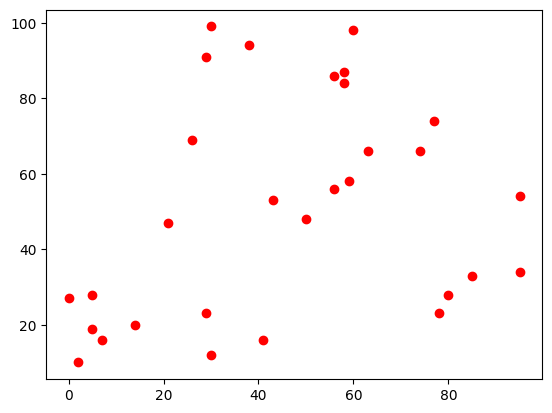

Points with covex hull:


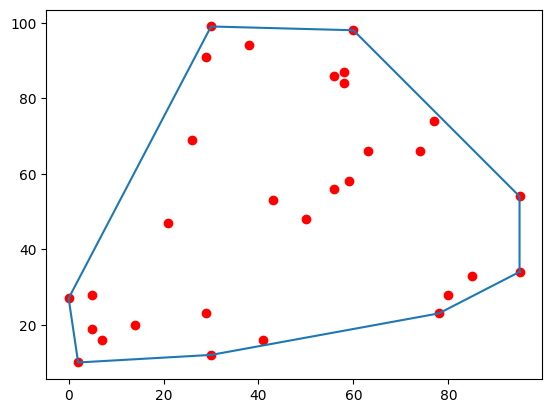

There are 8 points on the convex hull.
 They are: 
X: 095, Y: 034
X: 078, Y: 023
X: 030, Y: 012
X: 002, Y: 010
X: 000, Y: 027
X: 030, Y: 099
X: 060, Y: 098
X: 095, Y: 054


In [8]:
if __name__ == "__main__":
    
    # Generating random points for algorithm with user input and error checking.
    check = False
    while not check:
        try:
            num_points = int(input("Please enter number of randomly generated points to make convex hull around: "))
            if num_points > 2:
                check = True
            else:
                print("Error: more points required for quickhull")
        except:
            print("Error: wrong input format")
    points =[]
    for i in range(num_points):
        points.append([random.randint(0,100), random.randint(0,100)])


    # Create a copy of the points.
    final = points.copy()

    # Run quickhull algorithm.
    convex_hull = quickhull(points)
    
    # Plot points and the convex hull.
    print("Points without convex hull:")
    plot_convexhull(final, [])
    print("Points with covex hull:")
    plot_convexhull(final, convex_hull)
    print("There are " + str(len(convex_hull)) + " points on the convex hull.\n They are: ")
    for i in convex_hull:
        print("X: " + str(i[0]).zfill(3) + ", Y: " + str(i[1]).zfill(3))
        
